# Feature Selection
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Three importance of performing feature selection before modeling your data are:
##Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
##Improves Accuracy: Less misleading data means modeling accuracy improves.
##Reduces Training Time: Less data means that algorithms train faster.

This section lists 4 feature selection recipes for machine learning in Python
##Univariate Selection
##Recursive Feature Elimination
##Principal Component Analysis
F##eature Importance

In [1]:
import numpy as np

In [2]:
x = np.array([[1,2,3,4,5,6]])
y = np.array([0,3,6,9,12,15])

In [3]:
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

In [4]:
np.cov(x,y)

array([[ 3.5, 10.5],
       [10.5, 31.5]])

In [5]:
import matplotlib.pyplot as plt

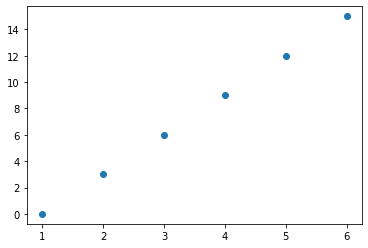

In [6]:
plt.scatter(x,y)

# Univariate Selection¶
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

1.The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
2.Many different statistical test scan be used with this selection method. For example the ANOVA F-value method is appropriate for numerical inputs and categorical data, as we see in the Pima dataset. This can be used via the f_classif() function. We will select the 4 best features using this method in the example below.

In [7]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [8]:
# load data
filename = 'https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/pima-indians-diabetes.csv'
dataframe = read_csv(filename)

In [9]:
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
array = dataframe.values

In [11]:
X = array[:,0:8]
Y = array[:,8]

f_classif --> ANOVA F-value between label/feature for classification tasks.

mutual_info_classif--> Mutual information for a discrete target.

chi2-->Chi-squared stats of non-negative features for classification tasks.

f_regression--> F-value between label/feature for regression tasks.

mutual_info_regression--> Mutual information for a continuous target.

SelectPercentile--> Select features based on percentile of the highest scores.

SelectFpr --> Select features based on a false positive rate test.

SelectFdr -->Select features based on an estimated false discovery rate.

SelectFwe --> Select features based on family-wise error rate.

GenericUnivariateSelect-->Univariate feature selector with configurable mode

In [14]:
# feature extraction
test = SelectKBest(score_func=f_classif, 
                   k=4)
fit = test.fit(X, Y)

In [15]:
fit.score_func(X,Y)

(array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
         13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124]),
 array([5.06512730e-10, 8.93543165e-43, 7.15139001e-02, 3.83477048e-02,
        2.86186460e-04, 1.22980749e-16, 1.25460701e-06, 2.20997546e-11]))

In [16]:
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]


In [17]:
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


In [18]:
import pandas as pd
pd.Series(fit.scores_)

0     39.670227
1    213.161752
2      3.256950
3      4.304381
4     13.281108
5     71.772072
6     23.871300
7     46.140611
dtype: float64

 # Recursive Feature Elimination
1.The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

2.It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

3.You can learn more about the RFE class in the scikit-learn documentation.



In [19]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [20]:
# feature extraction
model = LogisticRegression(solver='lbfgs',max_iter=500)

In [21]:
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 6 5 1 1 3]


In [22]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
print("Rank 1 Features")
dataframe[['Pregnancies','BMI', 'DiabetesPedigreeFunction']].head(2)

Rank 1 Features


,Pregnancies,BMI,DiabetesPedigreeFunction
0,6,33.6,0.627
1,1,26.6,0.351


# Principal Component Analysis¶
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In the example below, we use PCA and select 3 principal components.

Learn more about the PCA class in scikit-learn by reviewing the PCA API. Dive deeper into the math behind PCA on the Principal Component Analysis Wikipedia article.

In [24]:
from sklearn.decomposition import PCA

In [25]:
X.shape

(768, 8)

In [26]:
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)

Explained Variance: [0.889 0.062 0.026]


In [27]:
print(fit.components_)

[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


In [28]:
pca.n_features_

8

# Feature Importance¶
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset. You can learn more about the ExtraTreesClassifier class in the scikit-learn API.

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [30]:
imp = model.feature_importances_

In [31]:
for I,v in enumerate(imp):
    print('Feature: %0d, Score: %.2f' % (I,v))

Feature: 0, Score: 0.11
Feature: 1, Score: 0.22
Feature: 2, Score: 0.10
Feature: 3, Score: 0.07
Feature: 4, Score: 0.08
Feature: 5, Score: 0.14
Feature: 6, Score: 0.12
Feature: 7, Score: 0.16


<BarContainer object of 8 artists>

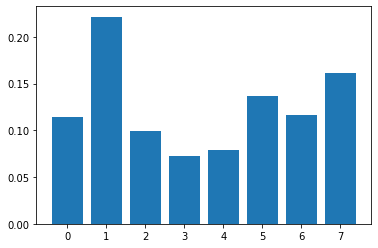

In [32]:
plt.bar([x for x in range(len(imp))],imp)